In [4]:
### Import necessary packages ..

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

    The column or features in the dataset:
    
    Id
    ProductId — unique identifier for the product
    UserId — unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator — number of users who found the review helpful
    HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
    Score — rating between 1 and 5
    Time — timestamp for the review
    Summary — brief summary of the review
    Text — text of the review

In [6]:
from IPython.display import Image
Image(filename=r'C:\Users\mcr\Pictures\Camera Roll/amazon.png') 

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mcr\\Pictures\\Camera Roll/amazon.png'

## 1.. reading data from Sqlite database

In [7]:
#### U can check online its table name of "database.sqlite" on https://sqliteonline.com/

In [8]:
import sqlite3

In [11]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect(r'C:\Users\lenovo\Documents\Job files\data tools\Amazon\database.sqlite')

In [12]:
type(con)

sqlite3.Connection

#### reading data from Sqlite database

In [13]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [14]:
df.shape ## checking dimensions of df dataframe ..

(568454, 10)

## 2.. Data Preparation !
    Doing basic cleaning/Data wrangling(remove invalid rows , remove duplicate rows ..) & convert "time" feature data-type 
    to date-time

In [15]:
type(df) ## ie df is a dataframe

pandas.core.frame.DataFrame

In [16]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [17]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [18]:
'''

HelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )
Helpfulnessnumerator is among those how many found it helpful…..consider it like a percentage….

So, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator..


'''

'\n\nHelpfulnessDenominator is : people found useful count + people found not so useful count (ie how many people reviewed )\nHelpfulnessnumerator is among those how many found it helpful…..consider it like a percentage….\n\nSo, from this we can see that HelfulnessNumerator is always less than or equal to HelpfulnesDenominator..\n\n\n'

In [19]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator'] 

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [20]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]   ## invalid rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [21]:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]  ## valid rows 

In [22]:
df_valid.shape

(568452, 10)

### lets find out whether instances/rows are duplicate or not !


    Deduplication means removing duplicate rows, It is necessary to remove duplicates in order to get unbaised results,
    
    Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for 
    different products, so we will remove those records

In [23]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [24]:
df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [25]:
df_valid[df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [26]:
### ie , approx 174521 are duplicated .. so u have to remove these duplicate rows ..

In [33]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text']) .copy()

In [34]:
data.shape

(393931, 10)

In [35]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

#### Time — timestamp for the review
    convert time feature data-type from int64 to date-time !

In [36]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [37]:
pd.to_datetime(data['Time'])

### as default is : unix start time "1970-01-01"

### 00:00:01.303862400 ->> by-default this time is in "nano-second" as default value of unit = "ns"
### so lets customize "unit" parameter to get time in second ..

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393931, dtype: datetime64[ns]

In [38]:
data['Time'] = pd.to_datetime(data['Time'] , unit='s')

In [39]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## 3.. Analyse to what User Amazon Can recommend more product ? 

#### Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [40]:
data.shape

(393931, 10)

In [41]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [42]:
data['ProfileName']

0                              delmartian
1                                  dll pa
2         Natalia Corres "Natalia Corres"
3                                    Karl
4           Michael D. Bigham "M. Wassir"
                       ...               
568449                   Lettie D. Carter
568450                          R. Sawyer
568451                      pksd "pk_007"
568452            Kathy A. Welch "katwel"
568453                           srfell17
Name: ProfileName, Length: 393931, dtype: object

In [43]:
data['ProfileName'].nunique()

### Total unique profile-name are 218418
## Note : Profile_Name could be same but User-ID will be different , so lets consider UserID for this analysis ..

218418

In [44]:
data['UserId'].nunique()

## ie total users are 256059

256059

In [45]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [46]:
data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  })

### Since we want features as : 'Number_of_summaries','number_of_text','Avg_score','Number_of_products_purchased'
## Hence calling above aggregations makes sense :

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [47]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by='ProductId' , ascending=False)

In [48]:
recommend_df.columns = ['Number_of_summaries' , 'num_text' , 'avg_score' , 'No_of_prods_purchased']

In [49]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211
...,...,...,...,...
A1HRZKUDP9GC8,1,1,1.000000,1
A1HRZ2C8FH70YF,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [50]:
### lets find Top 10 users ! 

In [51]:
recommend_df.index[0:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [52]:
recommend_df['No_of_prods_purchased'][0:10].values

array([329, 278, 259, 214, 211, 161, 146, 129, 119, 118])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'AY12DBB0U420B'),
  Text(1, 0, 'A3OXHLG6DIBRW8'),
  Text(2, 0, 'A281NPSIMI1C2R'),
  Text(3, 0, 'A1YUL9PCJR3JTY'),
  Text(4, 0, 'A1Z54EM24Y40LL'),
  Text(5, 0, 'A2MUGFV2TDQ47K'),
  Text(6, 0, 'A3D6OI36USYOU1'),
  Text(7, 0, 'AZV26LP92E6WU'),
  Text(8, 0, 'AKMEY1BSHSDG7'),
  Text(9, 0, 'A2GEZJHBV92EVR')])

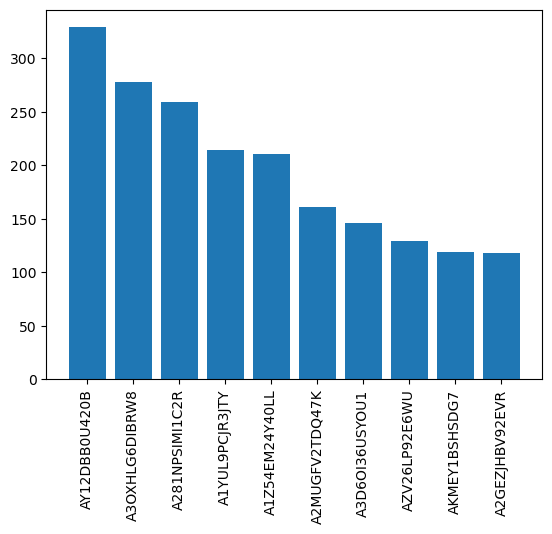

In [53]:
plt.bar(recommend_df.index[0:10] , recommend_df['No_of_prods_purchased'][0:10].values)
plt.xticks(rotation='vertical')

In [54]:
'''
Inference : These are the Top 10 Users so we can recommend more & more Products to these User Id 
            as there will be a high probability that these person are going to be buy more
            
'''

'\nInference : These are the Top 10 Users so we can recommend more & more Products to these User Id \n            as there will be a high probability that these person are going to be buy more\n            \n'

## 4.. which product has good number of reviews ? 

In [55]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [56]:
len(data['ProductId'].unique())

## We can see that there are 67624 types of products in the dataset.

67624

In [57]:
### Among 67624 products , lets pick most sold product for Analysis 
### We will consider that product as most sold product which must be sold atleast 600 times..

In [58]:
## Que : how u can come up with a idea that threshold value is 500..
## Ans : it depends upon data behaviour & typically domain expertise suggest u what can be the best value..

In [59]:
prod_count = data['ProductId'].value_counts().to_frame()

In [60]:
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
...,...
B006SQBRMA,1
B001EO5TPM,1
B001RN2W4Q,1


In [63]:
prod_count['ProductId'] > 500

KeyError: 'ProductId'

In [64]:
# 1. Print all actual column names
print("Actual column names:")
print(prod_count.columns.tolist())

# 2. Strip whitespace and fix hidden characters
prod_count.columns = prod_count.columns.str.strip()

# 3. Print again to verify
print("\nCleaned column names:")
print(prod_count.columns.tolist())


Actual column names:
['count']

Cleaned column names:
['count']


In [65]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [67]:
freq_prod_ids = prod_count[prod_count['count']>500].index

In [68]:
freq_prod_ids  ## most sold products

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [69]:
## lets separate dataframe of most sold products only !

In [70]:
data['count'].isin(freq_prod_ids)

KeyError: 'count'

In [72]:
print("Columns in 'data' DataFrame:")
print(data.columns.tolist())

Columns in 'data' DataFrame:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [73]:
data['ProductId'].isin(freq_prod_ids)

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393931, dtype: bool

In [74]:
fre_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [75]:
fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


In [76]:
fre_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

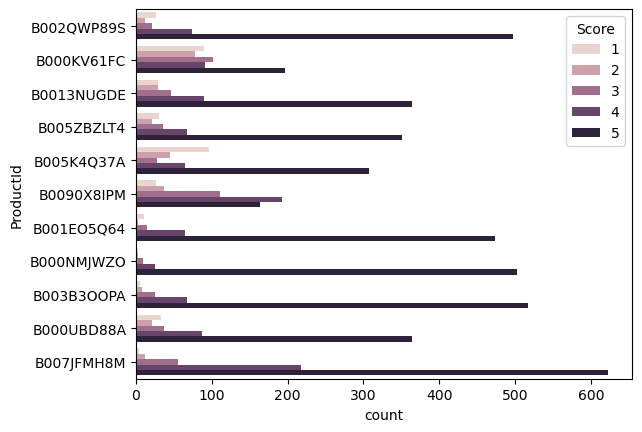

In [77]:
sns.countplot(y = 'ProductId' , data = fre_prod_df , hue='Score')

## 5.. Is there any difference between behaviour of frequent viewers & not frequent viewers ?

In [78]:
'''

First lets understand who are frequent viewers & who are not frequent viewers ..

Frequent viewers are those who have bought products atleast 50 times or more ..
Non-Frequent viewers are those who have bought products less than 50 times 


'''

'\n\nFirst lets understand who are frequent viewers & who are not frequent viewers ..\n\nFrequent viewers are those who have bought products atleast 50 times or more ..\nNon-Frequent viewers are those who have bought products less than 50 times \n\n\n'

In [79]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [80]:
x = data['UserId'].value_counts()

In [81]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
A1FVF43OQJE2AH      1
A1MNIZYWGVRVGF      1
A2CLE7G5FK24AU      1
A10R47UIIJHJQT      1
A25RYX4NFWDJ2N      1
Name: count, Length: 256059, dtype: int64

In [82]:
data.head(7)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,2012-07-12,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [83]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
A1FVF43OQJE2AH      1
A1MNIZYWGVRVGF      1
A2CLE7G5FK24AU      1
A10R47UIIJHJQT      1
A25RYX4NFWDJ2N      1
Name: count, Length: 256059, dtype: int64

In [84]:
x['AY12DBB0U420B']

## "AY12DBB0U420B" has bought 329 products ..

np.int64(329)

In [85]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user]>50 else "Not Frequent")

In [86]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent


In [87]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [88]:
## lets separate dataframe for both "frequent_viewers" & for "not_frequent_viewers" ..

In [89]:
data['viewer_type']=='Not Frequent'

0         True
1         True
2         True
3         True
4         True
          ... 
568449    True
568450    True
568451    True
568452    True
568453    True
Name: viewer_type, Length: 393931, dtype: bool

In [90]:
not_freq_df = data[data['viewer_type']=='Not Frequent']
freq_df = data[data['viewer_type']=='Frequent']

In [91]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

In [92]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [93]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

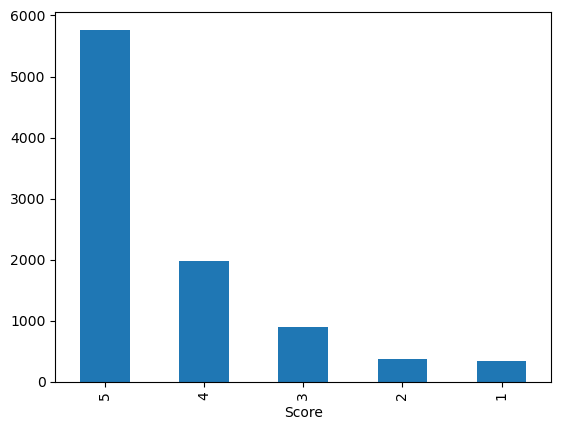

In [94]:
### lets plot above results using bar-plot !
freq_df['Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

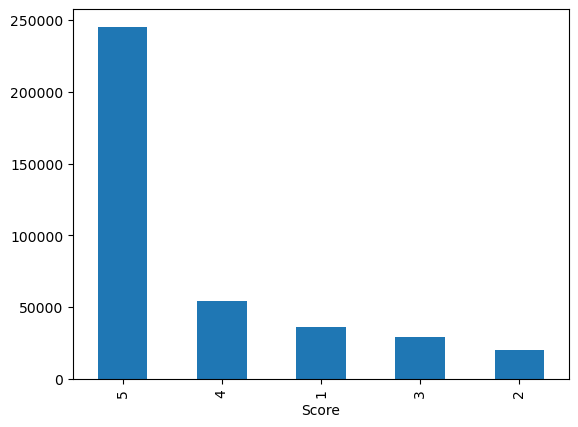

In [95]:
not_freq_df['Score'].value_counts().plot(kind='bar')

In [96]:
'''
The distribution of ratings among frequent reviewers is similar to that of all reviews. 
However, we can see that frequent reviewers give less 5-star reviews and less 1-star review.
Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.

'''

'\nThe distribution of ratings among frequent reviewers is similar to that of all reviews. \nHowever, we can see that frequent reviewers give less 5-star reviews and less 1-star review.\nFrequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.\n\n'

## 6.. Are frequent users more verbose ?  ( ie someone who speaks or post alot )

In [97]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

In [98]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 393931, dtype: object

In [99]:
data[['UserId' , 'ProductId' , 'Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [100]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [101]:
type(data['Text'][0])

str

In [102]:
type(data['Text'][0].split(' '))

### we can call split on string data to convert into list based on Separator that I will pass so that I will compute total
## total words in feedback 

list

In [103]:
len(data['Text'][0].split(' '))

49

In [104]:
def calculate_length(text):
    return len(text.split(' '))

In [105]:
data['Text_length'] = data['Text'].apply(calculate_length)

In [106]:
## lets separate dataframe for both "frequent_viewers" & for "not_frequent_viewers" ..

In [107]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [108]:
not_freq_data = data[data['viewer_type']=='Not Frequent']
freq_data = data[data['viewer_type']=='Frequent']

In [109]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...,Not Frequent,37


(0.0, 600.0)

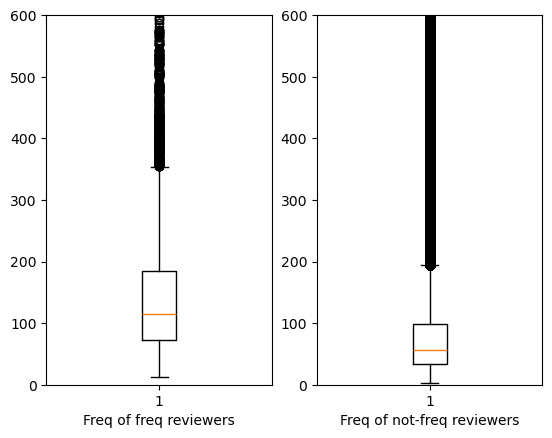

In [110]:
# define figure so that u can customize as per your need !
fig = plt.figure() 

#add subplots
ax1 = fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel('Freq of freq reviewers') ## adding xlabel
ax1.set_ylim(0,600) ## setting limit on y-axis..

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel('Freq of not-freq reviewers')
ax2.set_ylim(0,600)

In [111]:
'''

 boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & 
 whiskers may be defined in different ways in different tools & packages..

sometimes it shows 99th percentile & 1 percentile value for different package 
sometimes it shows min & max value for different package ..


'''

'\n\n boxplot basically gives us 25th percentile , 50th percentile(median) , 75th percentile & \n whiskers may be defined in different ways in different tools & packages..\n\nsometimes it shows 99th percentile & 1 percentile value for different package \nsometimes it shows min & max value for different package ..\n\n\n'

In [112]:
'''
Conclusion : 

The distributions of word counts for frequent and infrequent reviews shows that 
infrequent reviewers have a large amount of reviews of low word count.
On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. 



'''

'\nConclusion : \n\nThe distributions of word counts for frequent and infrequent reviews shows that \ninfrequent reviewers have a large amount of reviews of low word count.\nOn the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. \n\n\n\n'

## 7.. sentiment analysis ! 

#### What is sentiment analysis?
    Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
    Some examples of applications for sentiment analysis include:

    1. Analyzing the social media discussion around a certain topic
    2. Evaluating survey responses
    3. Determining whether product reviews are positive or negative


In [113]:
#!pip install textblob

In [115]:
from textblob import TextBlob

In [117]:
data['Summary'][0]

'Good Quality Dog Food'

In [118]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [119]:
data.shape

(393931, 12)

In [120]:
sample = data[0:50000]

### if u do not have good specifications , then its good to consider sample of data ..

In [121]:
polarity = []

for text in sample['Summary']: # list which will contain the polarity of the Summaries 
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
    

In [122]:
len(polarity)

50000

In [123]:
sample['polarity'] = polarity

In [124]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_length,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,49,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,31,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,99,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,43,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,30,0.8


In [125]:
sample_negative= sample[sample['polarity']<0]

sample_positive= sample[sample['polarity']>0]

In [126]:
from collections import Counter

In [127]:
Counter(sample_negative['Summary']).most_common(10) ## most used negative keywords

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [128]:
Counter(sample_positive['Summary']).most_common(10) ## most used positive keywords

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]